In [2]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)

/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4865.486111
1,2012,Afternoon,R,6232.222222
2,2012,Morning,L,5928.235294
3,2012,Afternoon,L,4930.235294
4,2013,Morning,R,5558.046154
5,2013,Afternoon,R,7013.169231
6,2013,Morning,L,6880.406780
7,2013,Afternoon,L,5692.966102
8,2014,Morning,R,5520.048387
9,2014,Afternoon,R,7181.580645


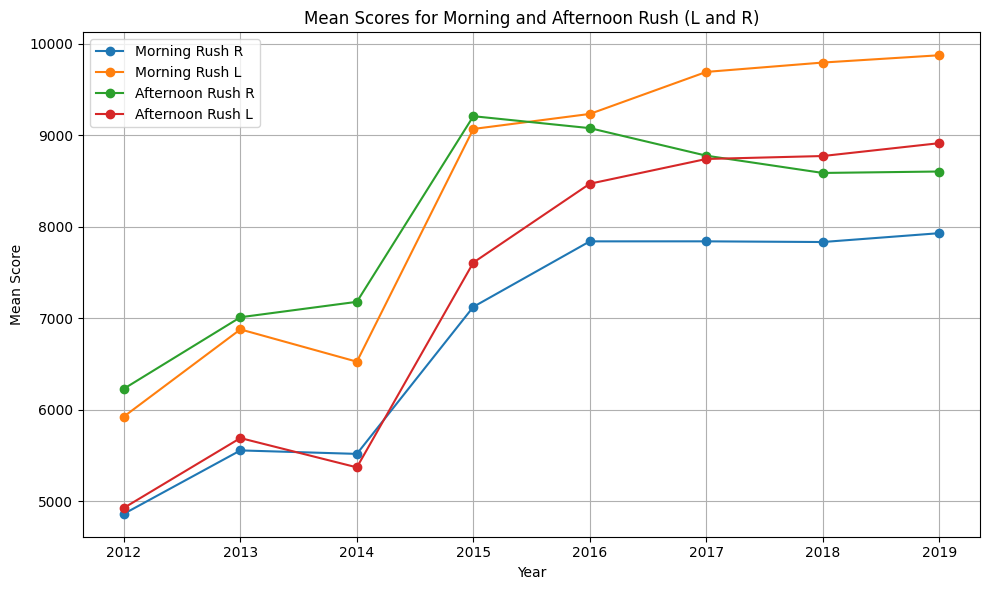

In [3]:
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Expected mean score for 2023 (Morning Rush R): 8006.18
Expected mean score for 2023 (Morning Rush L): 10764.10
Expected mean score for 2023 (Afternoon Rush R): 7877.42
Expected mean score for 2023 (Afternoon Rush L): 9474.87


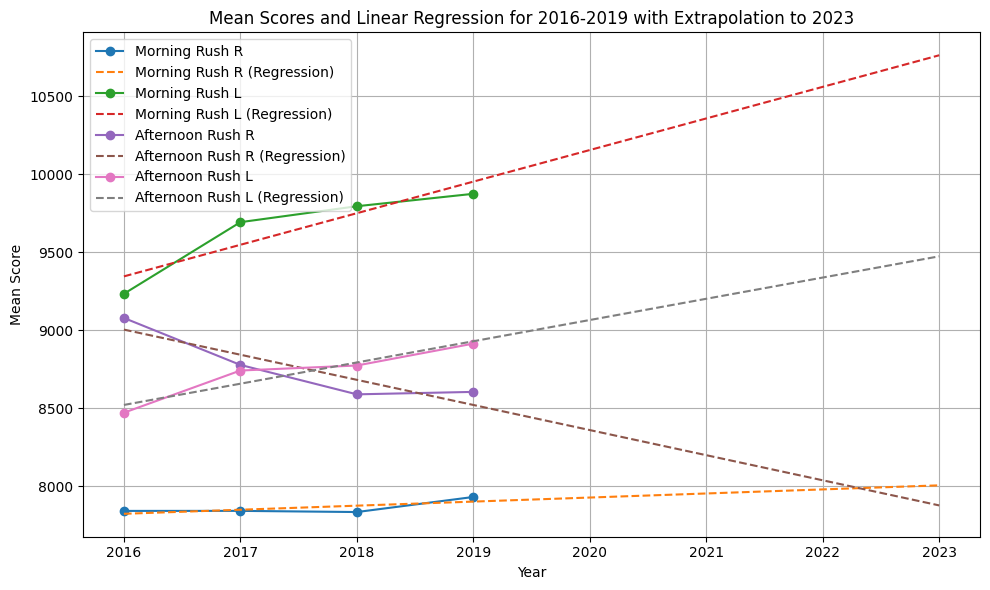

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the data for the years 2016-2019
df_recent = df_results[(df_results['Year'] >= 2016) & (df_results['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # Include 2023 for extrapolation

# Create a new figure for the graph
plt.figure(figsize=(10, 6))

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter the data for each combination of rush hour and direction
        df_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        
        # Extract the mean scores and reshape
        mean_scores = df_filtered['Mean Score'].values
        
        # Perform linear regression based on 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores up to 2023 based on the regression model
        predicted_scores = reg.predict(all_years)
        
        # Plot actual data points (2016-2019)
        plt.plot(df_filtered['Year'], mean_scores, label=f'{rush} Rush {direction}', marker='o')
        
        # Plot the linear regression line from 2016 to 2023
        plt.plot(all_years, predicted_scores, linestyle='--', label=f'{rush} Rush {direction} (Regression)')
        
        # Print the expected mean score for 2023
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')

# Add titles and labels
plt.title('Mean Scores and Linear Regression for 2016-2019 with Extrapolation to 2023')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()





Expected mean score for 2023 (Morning Rush R): 8006.18
Actual mean score for 2023 (Morning Rush R): 8472.00
Expected mean score for 2023 (Morning Rush L): 10764.10
Actual mean score for 2023 (Morning Rush L): 10026.13
Expected mean score for 2023 (Afternoon Rush R): 7877.42
Actual mean score for 2023 (Afternoon Rush R): 9167.93
Expected mean score for 2023 (Afternoon Rush L): 9474.87
Actual mean score for 2023 (Afternoon Rush L): 9024.65


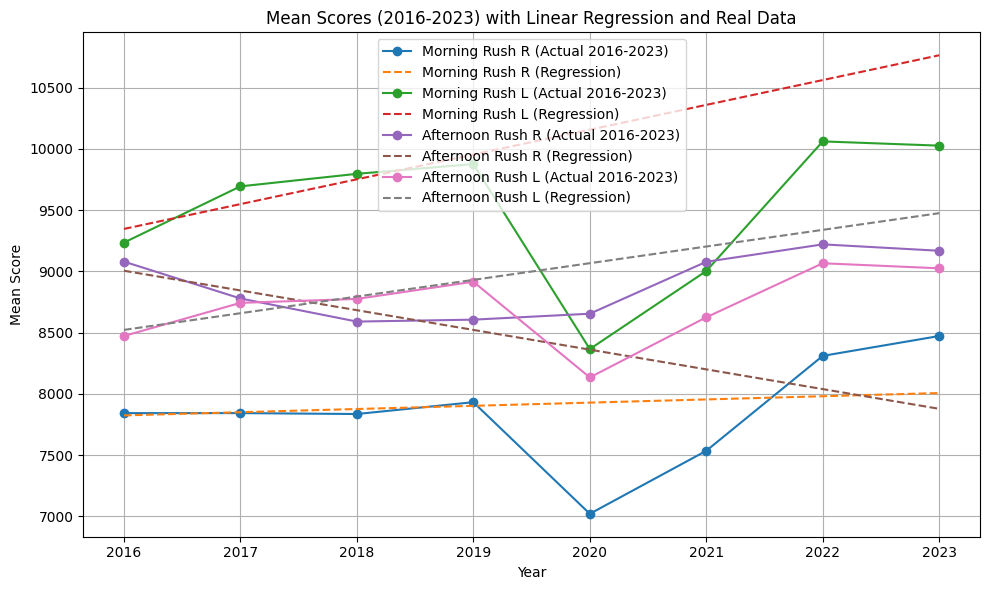

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# List of file paths for the datasets, including 2020-2023
data_files_extended = {
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results for all years (2016-2023)
results_extended = []

# Loop through the datasets for the extended years
for year, file in data_files_extended.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute) and further conditions
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) and 'L' (left) directions
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush) for both directions
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()
    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
    # Store the results for each combination
    results_extended.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    results_extended.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    results_extended.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    results_extended.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_extended = pd.DataFrame(results_extended)

# Prepare for plotting and linear regression
df_recent = df_extended[(df_extended['Year'] >= 2016) & (df_extended['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # For regression (2016-2023)

# Create a new figure for the graph
plt.figure(figsize=(10, 6))

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter data for the specific rush hour and direction (2016-2023)
        df_filtered = df_extended[(df_extended['Rush'] == rush) & (df_extended['Direction'] == direction)]
        
        # Extract the data for linear regression (only for 2016-2019)
        df_recent_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        mean_scores = df_recent_filtered['Mean Score'].values
        
        # Perform linear regression on the 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores from 2016 to 2023
        predicted_scores = reg.predict(all_years)
        
        # Plot real data as a continuous line for 2016-2023
        plt.plot(df_filtered['Year'], df_filtered['Mean Score'], label=f'{rush} Rush {direction} (Actual 2016-2023)', marker='o')

        # Plot the linear regression line from 2016 to 2023
        plt.plot(all_years, predicted_scores, linestyle='--', label=f'{rush} Rush {direction} (Regression)')

        # Print the expected and actual mean score for 2023
        actual_2023 = df_filtered[df_filtered['Year'] == 2023]['Mean Score'].values[0]
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')
        print(f'Actual mean score for 2023 ({rush} Rush {direction}): {actual_2023:.2f}')

# Add titles and labels
plt.title('Mean Scores (2016-2023) with Linear Regression and Real Data')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Expected mean score for 2023 (Morning Rush R): 8006.18
Actual mean score for 2023 (Morning Rush R): 8472.00
Expected mean score for 2023 (Morning Rush L): 10764.10
Actual mean score for 2023 (Morning Rush L): 10026.13
Expected mean score for 2023 (Afternoon Rush R): 7877.42
Actual mean score for 2023 (Afternoon Rush R): 9167.93
Expected mean score for 2023 (Afternoon Rush L): 9474.87
Actual mean score for 2023 (Afternoon Rush L): 9024.65


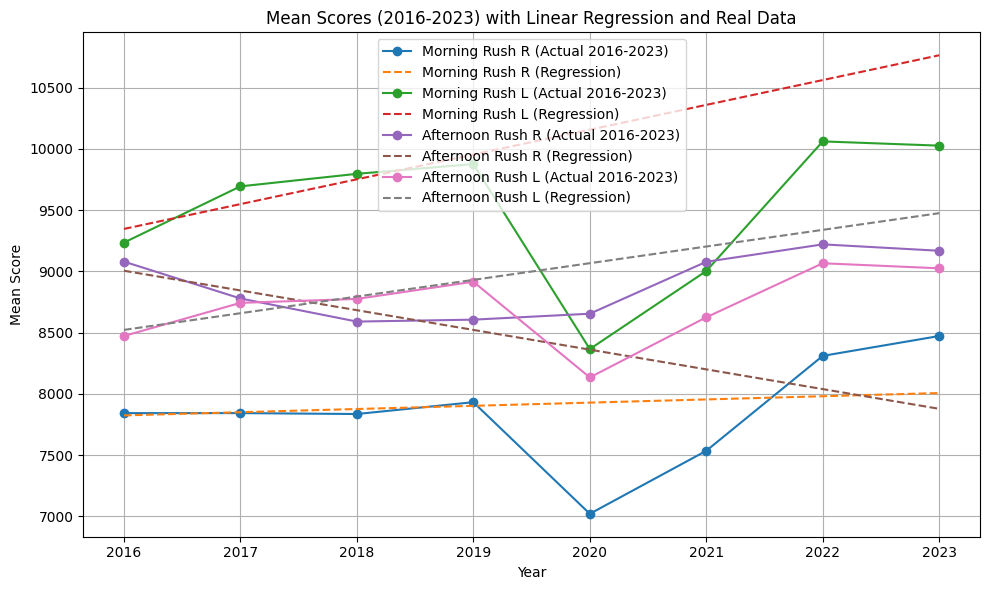


Comparison Results (Expected vs Actual Scores):
    Year       Rush Direction  Expected Score  Actual Score        Delta
0   2020    Morning         R     7927.991111   7020.347826  -907.643285
4   2020    Morning         L    10156.408261   8365.250000 -1791.158261
8   2020  Afternoon         R     8360.613333   8653.956522   293.343188
12  2020  Afternoon         L     9066.403478   8133.840909  -932.562569
1   2021    Morning         R     7954.053354   7534.847826  -419.205527
5   2021    Morning         L    10358.973217   9002.577778 -1356.395440
9   2021  Afternoon         R     8199.548842   9077.978261   878.429419
13  2021  Afternoon         L     9202.557565   8624.800000  -577.757565
2   2022    Morning         R     7980.115596   8309.717391   329.601795
6   2022    Morning         L    10561.538174  10060.804348  -500.733826
10  2022  Afternoon         R     8038.484350   9220.152174  1181.667824
14  2022  Afternoon         L     9338.711652   9065.826087  -272.885565
3 

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# List of file paths for the datasets, including 2020-2023
data_files_extended = {
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results for all years (2016-2023)
results_extended = []

# Loop through the datasets for the extended years
for year, file in data_files_extended.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute) and further conditions
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) and 'L' (left) directions
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush) for both directions
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()
    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
    # Store the results for each combination
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'R', 'Mean Score': mean_score_R_OS_R})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'R', 'Mean Score': mean_score_R_AS_R})
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'L', 'Mean Score': mean_score_R_OS_L})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'L', 'Mean Score': mean_score_R_AS_L})

# Convert the results into a DataFrame
df_extended = pd.DataFrame(results_extended)

# Prepare for plotting and linear regression
df_recent = df_extended[(df_extended['Year'] >= 2016) & (df_extended['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # For regression (2016-2023)

# Create a new figure for the graph
plt.figure(figsize=(10, 6))

# Initialize a list to store the comparison results for 2020-2023
comparison_results = []

# Define colors for real values
color_mapping_real = {
    ('Morning', 'R'): 'skyblue',
    ('Afternoon', 'R'): 'coral',
    ('Morning', 'L'): 'darkgreen',  # Changed to dark green for clarity
    ('Afternoon', 'L'): 'orchid'
}

# Define colors for expected values (lighter shades)
color_mapping_expected = {
    ('Morning', 'R'): 'lightblue',
    ('Afternoon', 'R'): 'lightcoral',
    ('Morning', 'L'): 'lightgreen',
    ('Afternoon', 'L'): 'thistle'
}

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter data for the specific rush hour and direction (2016-2023)
        df_filtered = df_extended[(df_extended['Rush'] == rush) & (df_extended['Direction'] == direction)]
        
        # Extract the data for linear regression (only for 2016-2019)
        df_recent_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        mean_scores = df_recent_filtered['Mean Score'].values
        
        # Perform linear regression on the 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores from 2016 to 2023
        predicted_scores = reg.predict(all_years)
        
        # Plot real data as a continuous line for 2016-2023
        plt.plot(df_filtered['Year'], df_filtered['Mean Score'], label=f'{rush} Rush {direction} (Actual 2016-2023)', marker='o')

        # Plot the linear regression line from 2016 to 2023
        plt.plot(all_years, predicted_scores, linestyle='--', label=f'{rush} Rush {direction} (Regression)')

        # Collect actual scores for 2020-2023
        actual_scores = df_filtered[df_filtered['Year'] >= 2020]['Mean Score'].values
        
        # Calculate the delta (Actual - Predicted) for 2020-2023 and store in the comparison_results list
        for i, year in enumerate(range(2020, 2023 + 1)):
            expected_score = predicted_scores[i + 4]  # Offset for the predicted scores (2020 is at index 4)
            actual_score = actual_scores[i]
            delta = actual_score - expected_score
            
            # Store the values for this combination
            comparison_results.append({
                'Year': year,
                'Rush': rush,
                'Direction': direction,
                'Expected Score': expected_score,
                'Actual Score': actual_score,
                'Delta': delta
            })
        
        # Print the expected and actual mean score for 2023
        actual_2023 = df_filtered[df_filtered['Year'] == 2023]['Mean Score'].values[0]
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')
        print(f'Actual mean score for 2023 ({rush} Rush {direction}): {actual_2023:.2f}')

# Add titles and labels
plt.title('Mean Scores (2016-2023) with Linear Regression and Real Data')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert comparison results to a DataFrame and sort by Year before printing it
df_comparison = pd.DataFrame(comparison_results).sort_values(by='Year')
print("\nComparison Results (Expected vs Actual Scores):")
print(df_comparison)




Expected mean score for 2023 (Morning Rush R): 8006.18
Actual mean score for 2023 (Morning Rush R): 8472.00
Expected mean score for 2023 (Morning Rush L): 10764.10
Actual mean score for 2023 (Morning Rush L): 10026.13
Expected mean score for 2023 (Afternoon Rush R): 7877.42
Actual mean score for 2023 (Afternoon Rush R): 9167.93
Expected mean score for 2023 (Afternoon Rush L): 9474.87
Actual mean score for 2023 (Afternoon Rush L): 9024.65


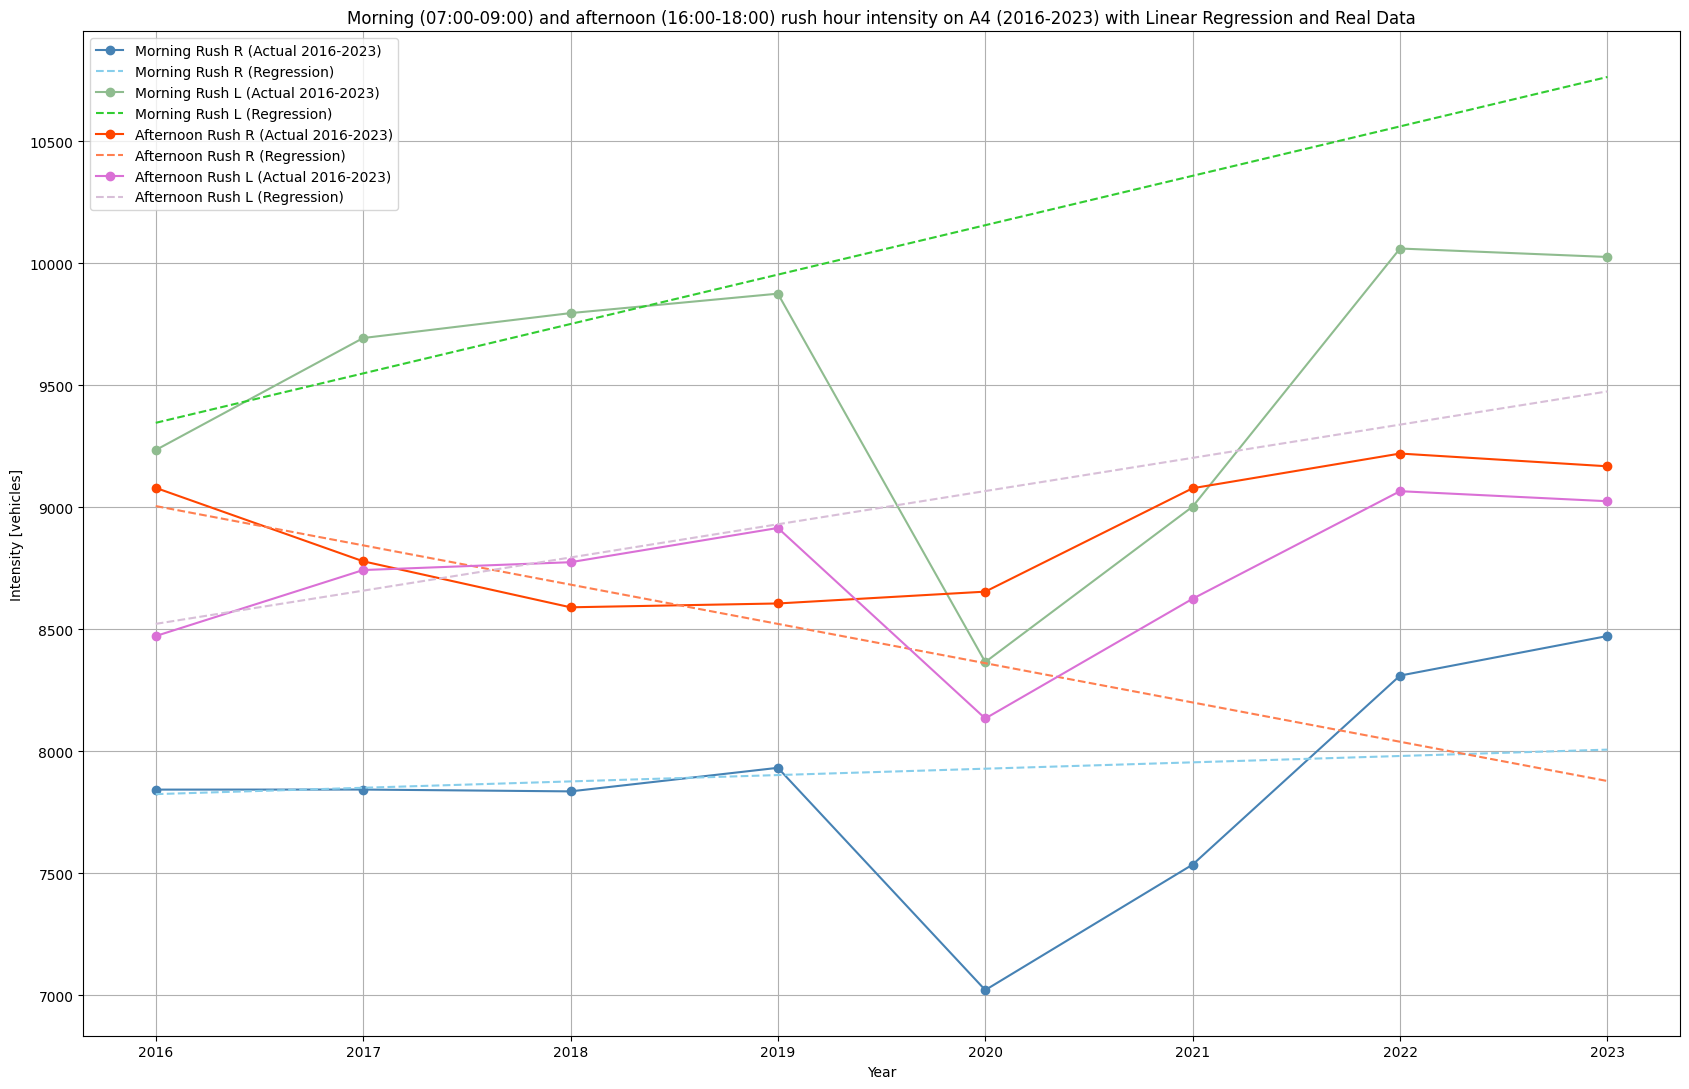


Comparison Results (Expected vs Actual Scores):
    Year       Rush Direction  Expected Score  Actual Score        Delta
0   2020    Morning         R     7927.991111   7020.347826  -907.643285
4   2020    Morning         L    10156.408261   8365.250000 -1791.158261
8   2020  Afternoon         R     8360.613333   8653.956522   293.343188
12  2020  Afternoon         L     9066.403478   8133.840909  -932.562569
1   2021    Morning         R     7954.053354   7534.847826  -419.205527
5   2021    Morning         L    10358.973217   9002.577778 -1356.395440
9   2021  Afternoon         R     8199.548842   9077.978261   878.429419
13  2021  Afternoon         L     9202.557565   8624.800000  -577.757565
2   2022    Morning         R     7980.115596   8309.717391   329.601795
6   2022    Morning         L    10561.538174  10060.804348  -500.733826
10  2022  Afternoon         R     8038.484350   9220.152174  1181.667824
14  2022  Afternoon         L     9338.711652   9065.826087  -272.885565
3 

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# List of file paths for the datasets, including 2020-2023
data_files_extended = {
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results for all years (2016-2023)
results_extended = []

# Loop through the datasets for the extended years
for year, file in data_files_extended.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute) and further conditions
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) and 'L' (left) directions
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush) for both directions
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()
    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
    # Store the results for each combination
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'R', 'Mean Score': mean_score_R_OS_R})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'R', 'Mean Score': mean_score_R_AS_R})
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'L', 'Mean Score': mean_score_R_OS_L})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'L', 'Mean Score': mean_score_R_AS_L})

# Convert the results into a DataFrame
df_extended = pd.DataFrame(results_extended)

# Prepare for plotting and linear regression
df_recent = df_extended[(df_extended['Year'] >= 2016) & (df_extended['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # For regression (2016-2023)

# Create a new figure for the graph
plt.figure(figsize=(17, 11))

# Initialize a list to store the comparison results for 2020-2023
comparison_results = []

# Define colors for real values
color_mapping_real = {
    ('Morning', 'R'): 'steelblue',
    ('Afternoon', 'R'): 'orangered',
    ('Morning', 'L'): 'darkseagreen',  # Changed to dark green for clarity
    ('Afternoon', 'L'): 'orchid'
}

# Define colors for expected values (lighter shades)
color_mapping_expected = {
    ('Morning', 'R'): 'skyblue',
    ('Afternoon', 'R'): 'coral',
    ('Morning', 'L'): 'limegreen',
    ('Afternoon', 'L'): 'thistle'
}

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter data for the specific rush hour and direction (2016-2023)
        df_filtered = df_extended[(df_extended['Rush'] == rush) & (df_extended['Direction'] == direction)]
        
        # Extract the data for linear regression (only for 2016-2019)
        df_recent_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        mean_scores = df_recent_filtered['Mean Score'].values
        
        # Perform linear regression on the 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores from 2016 to 2023
        predicted_scores = reg.predict(all_years)
        
        # Plot real data as a continuous line for 2016-2023 with specified colors
        plt.plot(df_filtered['Year'], df_filtered['Mean Score'], 
                 label=f'{rush} Rush {direction} (Actual 2016-2023)', 
                 color=color_mapping_real[(rush, direction)], marker='o')

        # Plot the linear regression line from 2016 to 2023 with lighter shades
        plt.plot(all_years, predicted_scores, linestyle='--', 
                 label=f'{rush} Rush {direction} (Regression)', 
                 color=color_mapping_expected[(rush, direction)])

        # Collect actual scores for 2020-2023
        actual_scores = df_filtered[df_filtered['Year'] >= 2020]['Mean Score'].values
        
        # Calculate the delta (Actual - Predicted) for 2020-2023 and store in the comparison_results list
        for i, year in enumerate(range(2020, 2023 + 1)):
            expected_score = predicted_scores[i + 4]  # Offset for the predicted scores (2020 is at index 4)
            actual_score = actual_scores[i]
            delta = actual_score - expected_score
            
            # Store the values for this combination
            comparison_results.append({
                'Year': year,
                'Rush': rush,
                'Direction': direction,
                'Expected Score': expected_score,
                'Actual Score': actual_score,
                'Delta': delta
            })
        
        # Print the expected and actual mean score for 2023
        actual_2023 = df_filtered[df_filtered['Year'] == 2023]['Mean Score'].values[0]
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')
        print(f'Actual mean score for 2023 ({rush} Rush {direction}): {actual_2023:.2f}')

# Add titles and labels
plt.title('Morning (07:00-09:00) and afternoon (16:00-18:00) rush hour intensity on A4 (2016-2023) with Linear Regression and Real Data')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend(loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert comparison results to a DataFrame and sort by Year before printing it
df_comparison = pd.DataFrame(comparison_results).sort_values(by='Year')
print("\nComparison Results (Expected vs Actual Scores):")
print(df_comparison)
